
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Below are the list of some of the columns in the dataset  with description of data contained in the columns:

>1.**ScheduledDay:** tells us on what day the patient set up their appointment.

>2.**AppointmentDay:** The day of the actuall appointment, when they have to visit the doctor.

>3.**Neighborhood:** indicates the location of the hospital.

>4.**Scholarship:** indicates whether or not the patient is enrolled in             Brasilia welfare program Bolsa Família.

>5.**AppointmentID:** identification of each appointment.

>6.**No-show:** indicates if the patient shows up for the appointment, *'No'*      for if they showed and *'Yes'* if they don't.

>7.**SMS_received:** indicates numbers of messages sent to the patient.


click **[here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)** for more information about the dataset.


### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?. 

N.B The project seek  to investiagate from the dataset which factors are helpful in predicting if a patient will show up for their scheduled appointment. It must be noted the project doesn't intend to explore all factors but some of the factors that are neccessary to make important decision.


 **Loading necessary Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section the data will be loaded and some operations will be performed to inspect data types, to look for missing values or possibly duplicated  data. 

**loading the data and checking data properties**

In [42]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016-Copy1.csv')

**Checking Data Properties**

In [43]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [44]:
#checking for empty rows
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
#checking for duplicated rows
df.duplicated().sum()

0

check the Introduction for a brief description of the dataset.


### Data Cleaning


**The following inconsistencies in the data will be corrected:**

1.PatientId will be dropped becauase it won't be useful for the analysis.

2.some columns with incorrect inputs will be corrected.

3.Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.

4.TimeStamp will be ignored in scheduleDay and AppointmentDay becuase it's not neccesary for the analysis.


In [46]:
#dropping PatientID

df.drop(columns = 'PatientId', inplace = True)

In [47]:
#renaming incorrect column names
df = df.rename(columns={'Hipertension' : 'Hypertension','Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow' })

In [48]:
split_columns = ['ScheduledDay', 'AppointmentDay']

for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("T")[0])



In [49]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).astype('datetime64[ns]')

<a id='eda'></a>
## Exploratory Data Analysis
*Now we will start exploring some features of the data to see what factors are helpful in predicting number of show up.*



### 1. Is Gender useful in predicting the number of  patients that show up?

```It's neccesary to separate the dataset according to gender to analysis the impart of gender on number of show up.```

In [50]:
#total_number of Females
Total_females= df[df['Gender'] == 'F']
Total_females = Total_females.loc[:,['Gender','NoShow']]

In [51]:
#counting the numbers of Females in the data set

T_Females = Total_females['Gender'].value_counts()
T_Females

F    71840
Name: Gender, dtype: int64

In [52]:
#Counting the numbers of female patient that show up and those that didn't show up
ShowedUP = Total_females[Total_females['NoShow'] == 'No']['NoShow'].count()
No_ShowUP = Total_females[Total_females['NoShow'] == 'Yes']['NoShow'].count()
ShowedUP, No_ShowUP

(57246, 14594)

In [53]:
#calculating the proportion of  total Female Patients that show up and those that didn't show up
Prop_ShowedUP = round((ShowedUP/T_Females) * 100)
Prop_No_ShowUP = round((No_ShowUP/ T_Females) * 100)
print("Proportion of Females that show up is {}%". format(Prop_ShowedUP.iloc[0]))
print("Proportion of Females that didn't show up is {}%". format(Prop_No_ShowUP.iloc[0]))


Proportion of Females that show up is 80.0%
Proportion of Females that didn't show up is 20.0%


In [54]:
#total_number of male Patients
Total_males= df[df['Gender'] == 'M']
Total_males = Total_males.loc[:,['Gender','NoShow']]

In [55]:
#counting the numbers of males in the data set
T_males = Total_males['Gender'].value_counts()
T_males

M    38687
Name: Gender, dtype: int64

In [56]:
#Counting the numbers of male patients that show up and those that didn't show up
ShowedUP = Total_males[Total_males['NoShow'] == 'No']['NoShow'].count()
No_ShowUP = Total_males[Total_males['NoShow'] == 'Yes']['NoShow'].count()


ShowedUP,No_ShowUP

(30962, 7725)

In [57]:
#calculating the proportion of  total male Patients that show up and those that didn't show up
Prop_ShowedUP = round((ShowedUP/T_males) * 100)
Prop_No_ShowUP = round((No_ShowUP/ T_males) * 100)


print(" {}% of total number males that registered showed up.". format(Prop_ShowedUP.iloc[0]))
print(" While {}% out of the total number of males that registered didn't show up.". format(Prop_No_ShowUP.iloc[0]))

 80.0% of total number males that registered showed up.
 While 20.0% out of the total number of males that registered didn't show up.


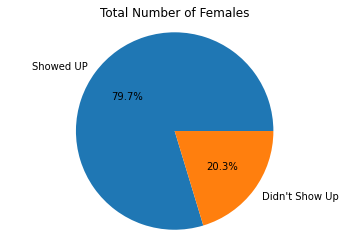

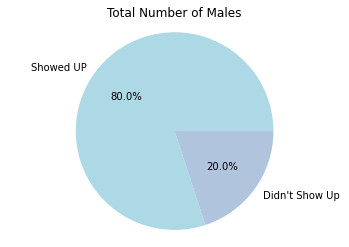

In [58]:
#drawing a pie chart to demonstrate the result

data= Total_females.NoShow.value_counts()
my_labels = ['Showed UP', "Didn't Show Up"]

plt.pie(data,labels = my_labels, autopct='%1.1f%%')
plt.title('Total Number of Females')
plt.axis('equal')
plt.show()



data = Total_males.NoShow.value_counts()
my_labels = ['Showed UP', "Didn't Show Up"]
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(data,labels = my_labels, autopct='%1.1f%%', colors=my_colors)
plt.title('Total Number of Males')
plt.axis('equal')
plt.show()


**From the pie-chart above the percentage of males and females(80%, 79% respectively) that show up and those that didn't show up (20.0% and 20.3%) are almost the same. Hence Gender is not a useful characteristics in predicting number of patients that will show up.**

### 2. Is the age of the patient  useful in predicting the number of  patients that show up?

In [59]:
#getting the number of ages in the data set
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

```It can be noticed that some age is 0, this will be dropped with the assumption that it's a mistake in data entry.```

In [60]:
#dropping patient with age = 0
df.drop(df[df['Age'] == 0].index, inplace = True)
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [61]:
#calculating the median age
Md_age = df.Age.median()
Md_age

38.0

In [62]:
#getting the number of  equal and above the median age
Higher = df[df['Age'] >= Md_age]
Higher = Higher.loc[:,['Age','NoShow']]

#seperating patients that showed and those that didn't show up
Showed_Up = Higher[Higher['NoShow'] == 'No']['NoShow'].count()
NO_Show_Up = Higher[Higher['NoShow'] == 'Yes']['NoShow'].count()

Showed_Up , NO_Show_Up`

SyntaxError: invalid syntax (3962878191.py, line 9)

In [ ]:
#getting the number of below the median age
lower = df[df['Age'] >  Md_age]
lower= lower.loc[:,['Age','NoShow']]

#seperating patients that showed and those that didn't show up
lower_Showed_Up = lower[lower['NoShow'] == 'No']['NoShow'].count()
lower_NO_Show_Up = lower[lower['NoShow'] == 'Yes']['NoShow'].count()
lower_Showed_Up, lower_NO_Show_Up

In [ ]:
#plotting chart to demon the number patients that showed and those that didn't show up above and below the median age
plt.bar(['Showed UP', "Didn't Show Up"], [lower_Showed_Up,lower_NO_Show_Up])
plt.title("A chart showing the number of people below the median Age")
plt.xlabel("Status")
plt.ylabel("Number of People");
plt.show();


plt.bar(['Showed UP', "Didn't Show Up"], [Showed_Up, NO_Show_Up], color = 'green')
plt.title("A chart showing the number of people above and equivalent to the median Age")
plt.xlabel("Status")
plt.ylabel("Number of People");

**The bar charts demonstrating the number of patients that didn't show up and those that show up accross both age level is the same. This means, however, that age is not a useful feature to predict the number of patients that will show up and those than won't show up.**

### 3. Is the numbers of Patient that received scholarship  useful in predicting the number of  patients that show up?

In [ ]:
df.Scholarship.unique()

In [64]:
#creating a Function to create piechart to avoid repeative codes

def myPiechart(df, xvar,titles = ['without','with'], colors = ['green', 'yellow']):
    """creating plot from the data set """
    
    ax = df.groupby(xvar)['NoShow'].value_counts().unstack().T.plot(kind='pie', subplots = True, figsize = (14,6),explode = [0,0.1],autopct='%1.1f%%', colors = colors);
   
    """setting the plot title"""
    
    ax[0].set_title('Show/No Show message:' +' '+ titles[0])
    ax[1].set_title('Show/No Show message:' +' '+ titles[1])
    plt.suptitle('Show/No show percentages by' + ' '+ (xvar).title(),weight = 'bold');


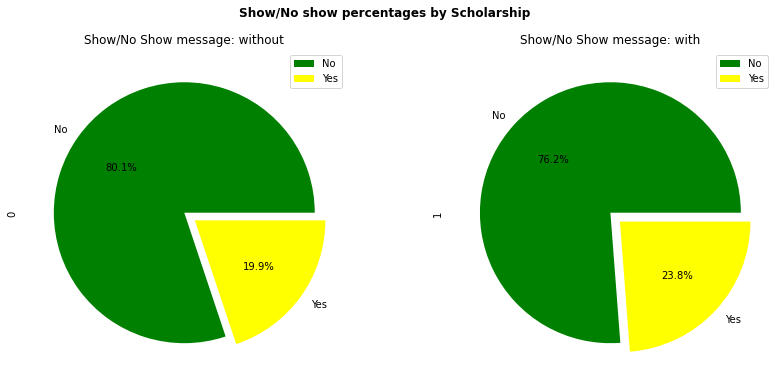

In [65]:
#plotting a pie chart to demonstrate the percetage of patient that Got Scholarship Versus those that didn't
myPiechart(df,'Scholarship')

**From the pie chart 76% of patient that got scholarship showed up while 80.1% of patients that didn't get scholarship showed. This means that patients that didn't get scholarship stands a higher chance of showing up compared to patients that got scholarship. Hence, the number  of patients that got scholarship is helpful in predicting number of patients that will show up.**

### 4. Is the numbers of Patient that received SMS  useful in predicting the number of  patients that show up?

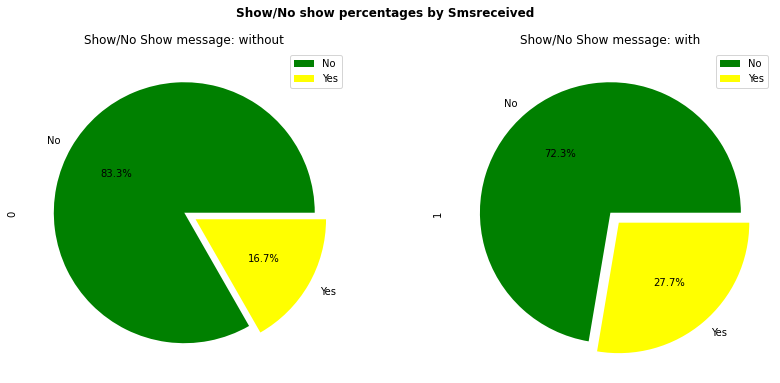

In [66]:
#plotting a pie chart to demonstrate the percetage of patient that Got Received SMS Versus those that didn't

myPiechart(df,'SMSReceived')

**From the pie chart 72.3% of patient that received SMS showed up while 80.1% of patients that didn't receive SMS showed up. This means that patients that didn't receive SMS  stands a higher chance of showing up compared to patients that received SMS. Hence,  the number  of patients that received SMS is helpful in predicting number of patients that will show up.**

<a id='conclusions'></a>
## Conclusions

> **This analysis involves cleaning the data to facilitate analysis. Afterwards explorative data analysis  was done to findout how the characteristics  can help predict number of show up.**

>**To clean the data some columns were renamed. ParendId has to be drop becuase it won't neccesary for analysis. In addition the cleaning also involved changing  the data type AppointmentDay and ScheduleDay to daytimme.**

>  **For explorative data analysis involves analysing how Gender, age, Scholarship and SMS received can help predict number of  show up.** 

>**From the analysis we can deduce that Gender and Age are not helpful statistics in predicting the number of show up. This is because the number of patients that show up and those that didn't show up have similar percentages both for Gender and ages.**

> **However, number of patients that received and didn't receive scholarship are helpful in predicting number of patients that will show up.**


## limitations of the project:
> **1.  It must be noted that the project doesn't intend to explore all factors but some of the factors that are neccessary to make important decision**

> **2. entries with ages equal to zero indicates that there are mistakes in the data entry, this could affect the result of the analysis.**


In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<a id='References'></a>
# References

https://www.kaggle.com/joniarroba/noshowappointments

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=A%20boxplot%20is%20a%20standardized,and%20what%20their%20values%20are.